<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install requirements

In [ ]:
!pip install sklearn pandas
!pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=b0c2d4e7c8dedf1d897c8ab3be1b5aabf3de4a0b4ffac070bd54298b74156b4f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read dataset

In [ ]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Call algorithms from sklearntrain_featurestrain_fea

In [ ]:
project = 'oryx'

df = pd.read_csv(f"drive/MyDrive/subtract/{project}/class.csv")
print(df)

                                         Hash  \
0    ba899dd5f05492b8c6e3e410d6a833c63392bf63   
1    27e9046b2bd92243c260efd8bcd0af46b92bdf9e   
2    27e9046b2bd92243c260efd8bcd0af46b92bdf9e   
3    27e9046b2bd92243c260efd8bcd0af46b92bdf9e   
4    d16f89b25fc5e12f94af6432274c66e0394c1743   
..                                        ...   
593  31fb3c41d9d4b4650dd5da05b2212c7d27cb1da9   
594  8de37c9b69a6688bc4af8f1d3601161a942aff58   
595  8de37c9b69a6688bc4af8f1d3601161a942aff58   
596  fddb336ac30ea3fb0bde91c61ef043f523d7d9fe   
597  fddb336ac30ea3fb0bde91c61ef043f523d7d9fe   

                                              LongName        CC  CCL  CCO  \
0    com.cloudera.oryx.lambda.serving.SecureAPIConf...  0.000000    0    0   
1         com.cloudera.oryx.app.serving.kmeans.Console  0.000000    0    0   
2            com.cloudera.oryx.app.serving.rdf.Console  0.000000    0    0   
3            com.cloudera.oryx.app.serving.als.Console  0.000000    0    0   
4            com.clou

In [ ]:
df

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,ba899dd5f05492b8c6e3e410d6a833c63392bf63,com.cloudera.oryx.lambda.serving.SecureAPIConf...,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.kmeans.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.als.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d16f89b25fc5e12f94af6432274c66e0394c1743,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,31fb3c41d9d4b4650dd5da05b2212c7d27cb1da9,com.cloudera.oryx.app.mllib.rdf.RDFCategorical...,0.685644,4,4,4,0.620253,0.625,49,40,...,0,0,0,0,0,0,1,0,0,1
594,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest,0.904762,1,1,1,0.714286,0.800,10,8,...,0,0,0,0,0,0,0,0,0,0
595,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest$1,1.000000,1,1,1,1.000000,1.000,6,5,...,0,0,0,0,0,0,0,0,0,0
596,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.serving.ModelManagerL...,1.000000,1,1,1,1.000000,1.000,6,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(3)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,ba899dd5f05492b8c6e3e410d6a833c63392bf63,com.cloudera.oryx.lambda.serving.SecureAPIConf...,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.kmeans.Console,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.rdf.Console,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail(4)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
594,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest,0.904762,1,1,1,0.714286,0.8,10,8,...,0,0,0,0,0,0,0,0,0,0
595,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest$1,1.000000,1,1,1,1.000000,1.0,6,5,...,0,0,0,0,0,0,0,0,0,0
596,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.serving.ModelManagerL...,1.000000,1,1,1,1.000000,1.0,6,6,...,0,0,0,0,0,0,0,0,0,0
597,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.speed.SpeedLayer$2,1.000000,1,1,1,1.000000,1.0,6,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               598 non-null    object 
 1   LongName                           598 non-null    object 
 2   CC                                 598 non-null    float64
 3   CCL                                598 non-null    int64  
 4   CCO                                598 non-null    int64  
 5   CI                                 598 non-null    int64  
 6   CLC                                598 non-null    float64
 7   CLLC                               598 non-null    float64
 8   LDC                                598 non-null    int64  
 9   LLDC                               598 non-null    int64  
 10  LCOM5                              598 non-null    int64  
 11  NL                                 598 non-null    int64  

In [ ]:
df.describe(include="all")

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,598,598,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,...,598.0,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.0,598.000000
unique,87,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,d16f89b25fc5e12f94af6432274c66e0394c1743,com.cloudera.oryx.lambda.AbstractSparkLayer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,45,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.083616,0.411371,0.963211,0.444816,0.076221,0.078048,7.473244,6.297659,...,0.0,0.769231,0.025084,0.041806,0.023411,0.108696,0.237458,0.307692,0.0,0.096990
std,NaN,NaN,0.175586,1.001509,2.711472,1.057540,0.160963,0.164450,19.164153,16.302573,...,0.0,1.448244,0.156510,0.283419,0.172052,0.561069,0.570464,1.954844,0.0,0.301794
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
df['Number of Bugs'].value_counts()

0    541
1     56
2      1
Name: Number of Bugs, dtype: int64

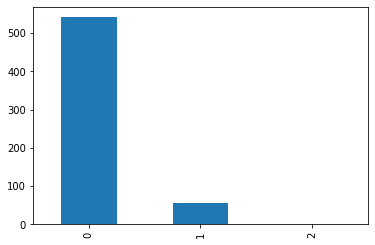

In [ ]:
df['Number of Bugs'].value_counts().plot(kind='bar')

In [ ]:
df

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,ba899dd5f05492b8c6e3e410d6a833c63392bf63,com.cloudera.oryx.lambda.serving.SecureAPIConf...,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.kmeans.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.als.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d16f89b25fc5e12f94af6432274c66e0394c1743,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,31fb3c41d9d4b4650dd5da05b2212c7d27cb1da9,com.cloudera.oryx.app.mllib.rdf.RDFCategorical...,0.685644,4,4,4,0.620253,0.625,49,40,...,0,0,0,0,0,0,1,0,0,1
594,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest,0.904762,1,1,1,0.714286,0.800,10,8,...,0,0,0,0,0,0,0,0,0,0
595,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest$1,1.000000,1,1,1,1.000000,1.000,6,5,...,0,0,0,0,0,0,0,0,0,0
596,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.serving.ModelManagerL...,1.000000,1,1,1,1.000000,1.000,6,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('Hash', axis=1, inplace=True)
df.drop('LongName', axis=1, inplace=True)

In [ ]:
df

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.685644,4,4,4,0.620253,0.625,49,40,1,3,...,0,0,0,0,0,0,1,0,0,1
594,0.904762,1,1,1,0.714286,0.800,10,8,1,0,...,0,0,0,0,0,0,0,0,0,0
595,1.000000,1,1,1,1.000000,1.000,6,5,1,0,...,0,0,0,0,0,0,0,0,0,0
596,1.000000,1,1,1,1.000000,1.000,6,6,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['Migration15 Rules'].value_counts()

0    598
Name: Migration15 Rules, dtype: int64

In [ ]:
df['Vulnerability Rules'].value_counts()

0    598
Name: Vulnerability Rules, dtype: int64

In [ ]:
df.drop('Migration15 Rules', axis=1, inplace=True)
df.drop('Vulnerability Rules', axis=1, inplace=True)

In [ ]:
df

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration13 Rules,Migration14 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
0,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.685644,4,4,4,0.620253,0.625,49,40,1,3,...,0,0,0,0,0,0,0,1,0,1
594,0.904762,1,1,1,0.714286,0.800,10,8,1,0,...,0,0,0,0,0,0,0,0,0,0
595,1.000000,1,1,1,1.000000,1.000,6,5,1,0,...,0,0,0,0,0,0,0,0,0,0
596,1.000000,1,1,1,1.000000,1.000,6,6,1,0,...,0,0,0,0,0,0,0,0,0,0


از آنجا که تعداد ستونها زیاد است و بررسی یک به یک آنها وقت گیر می باشد از دستور زیر برای حذف ستون با مقادیر مشابه در کل دیتافریم استفاده کردم

In [ ]:
df = df.T.drop_duplicates().T

In [ ]:
df

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.685644,4.0,4.0,4.0,0.620253,0.625,49.0,40.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
594,0.904762,1.0,1.0,1.0,0.714286,0.800,10.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595,1.000000,1.0,1.0,1.0,1.000000,1.000,6.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,1.000000,1.0,1.0,1.0,1.000000,1.000,6.0,6.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               598 non-null    object 
 1   LongName                           598 non-null    object 
 2   CC                                 598 non-null    float64
 3   CCL                                598 non-null    int64  
 4   CCO                                598 non-null    int64  
 5   CI                                 598 non-null    int64  
 6   CLC                                598 non-null    float64
 7   CLLC                               598 non-null    float64
 8   LDC                                598 non-null    int64  
 9   LLDC                               598 non-null    int64  
 10  LCOM5                              598 non-null    int64  
 11  NL                                 598 non-null    int64  

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [ ]:
train_set, test_set

(                                         Hash  \
 352  fddb336ac30ea3fb0bde91c61ef043f523d7d9fe   
 575  df27388cd4a3029d67283e23ecdd70b83fa4bd9b   
 334  fddb336ac30ea3fb0bde91c61ef043f523d7d9fe   
 302  01853e86889056e23179c30d4f596b952e18757d   
 127  0e536a808244ffd416c047e7c365d4f055ea1b8a   
 ..                                        ...   
 52   3b0fc229b3818b52dda4b6b863f9bca5dcfc4d86   
 238  eff199ff1f6cad1b4ff13829dfb29ff4884d4c31   
 379  0e536a808244ffd416c047e7c365d4f055ea1b8a   
 529  4d95d914ab266598320563fa9e6154937bf77e0e   
 419  fddb336ac30ea3fb0bde91c61ef043f523d7d9fe   
 
                                               LongName        CC  CCL  CCO  \
 352    com.cloudera.oryx.app.batch.mllib.als.ALSUpdate  0.000000    0    0   
 575  com.cloudera.oryx.app.serving.als.MostActiveUs...  0.559242    1    3   
 334        com.cloudera.oryx.common.pmml.PMMLUtilsTest  0.000000    0    0   
 302            com.cloudera.oryx.kafka.util.KafkaUtils  0.000000    0    0   
 12

In [ ]:
df.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,...,598.0,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.0,598.000000
mean,0.083616,0.411371,0.963211,0.444816,0.076221,0.078048,7.473244,6.297659,1.642140,1.809365,...,0.0,0.769231,0.025084,0.041806,0.023411,0.108696,0.237458,0.307692,0.0,0.096990
std,0.175586,1.001509,2.711472,1.057540,0.160963,0.164450,19.164153,16.302573,1.567797,1.277474,...,0.0,1.448244,0.156510,0.283419,0.172052,0.561069,0.570464,1.954844,0.0,0.301794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,3.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,8.000000,22.000000,8.000000,1.000000,1.000000,150.000000,126.000000,11.000000,5.000000,...,0.0,11.000000,1.000000,4.000000,2.000000,5.000000,4.000000,20.000000,0.0,2.000000


In [ ]:
test_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000
mean,0.066062,0.358333,0.858333,0.375000,0.059373,0.061971,6.291667,5.341667,1.658333,1.825000,...,0.0,0.675000,0.016667,0.016667,0.016667,0.125000,0.250000,0.233333,0.0,0.083333
std,0.150451,0.959655,2.673542,0.987846,0.135234,0.140079,18.019315,15.278092,1.707600,1.254655,...,0.0,1.290967,0.128556,0.128556,0.128556,0.601992,0.538438,0.959108,0.0,0.277544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,0.610860,7.000000,18.000000,7.000000,0.590909,0.608187,117.000000,104.000000,9.000000,4.000000,...,0.0,11.000000,1.000000,1.000000,1.000000,5.000000,3.000000,6.000000,0.0,1.000000


In [ ]:
train_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.0,478.000000
mean,0.088023,0.424686,0.989540,0.462343,0.080451,0.082085,7.769874,6.537657,1.638075,1.805439,...,0.0,0.792887,0.027197,0.048117,0.025105,0.104603,0.234310,0.326360,0.0,0.100418
std,0.181226,1.012282,2.723047,1.074599,0.166660,0.169914,19.447758,16.556417,1.532586,1.284406,...,0.0,1.485426,0.162826,0.310181,0.181415,0.550909,0.578724,2.133435,0.0,0.307761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.020270,0.750000,0.750000,0.750000,0.016484,0.020833,4.500000,3.750000,2.000000,3.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,8.000000,22.000000,8.000000,1.000000,1.000000,150.000000,126.000000,11.000000,5.000000,...,0.0,11.000000,1.000000,4.000000,2.000000,5.000000,4.000000,20.000000,0.0,2.000000


In [ ]:
minValues = train_set.min()

In [ ]:
minValues

Hash                                          008d439437affbae40d70282d6114384c0f813cc
LongName                             com.cloudera.oryx.api.serving.AbstractServingM...
CC                                                                                 0.0
CCL                                                                                  0
CCO                                                                                  0
                                                           ...                        
String and StringBuffer Rules                                                        0
Type Resolution Rules                                                                0
Unnecessary and Unused Code Rules                                                    0
Vulnerability Rules                                                                  0
Number of Bugs                                                                       0
Length: 98, dtype: object

In [ ]:
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 352 to 419
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               478 non-null    object 
 1   LongName                           478 non-null    object 
 2   CC                                 478 non-null    float64
 3   CCL                                478 non-null    int64  
 4   CCO                                478 non-null    int64  
 5   CI                                 478 non-null    int64  
 6   CLC                                478 non-null    float64
 7   CLLC                               478 non-null    float64
 8   LDC                                478 non-null    int64  
 9   LLDC                               478 non-null    int64  
 10  LCOM5                              478 non-null    int64  
 11  NL                                 478 non-null    int64

(None, None)

In [ ]:
df=(df-df.mean())/df.std()

<ipython-input-25-aed2c486173e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=(df-df.mean())/df.std()


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 352 to 419
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               478 non-null    object 
 1   LongName                           478 non-null    object 
 2   CC                                 478 non-null    float64
 3   CCL                                478 non-null    int64  
 4   CCO                                478 non-null    int64  
 5   CI                                 478 non-null    int64  
 6   CLC                                478 non-null    float64
 7   CLLC                               478 non-null    float64
 8   LDC                                478 non-null    int64  
 9   LLDC                               478 non-null    int64  
 10  LCOM5                              478 non-null    int64  
 11  NL                                 478 non-null    int64

In [ ]:
train_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.0,478.000000
mean,0.088023,0.424686,0.989540,0.462343,0.080451,0.082085,7.769874,6.537657,1.638075,1.805439,...,0.0,0.792887,0.027197,0.048117,0.025105,0.104603,0.234310,0.326360,0.0,0.100418
std,0.181226,1.012282,2.723047,1.074599,0.166660,0.169914,19.447758,16.556417,1.532586,1.284406,...,0.0,1.485426,0.162826,0.310181,0.181415,0.550909,0.578724,2.133435,0.0,0.307761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.020270,0.750000,0.750000,0.750000,0.016484,0.020833,4.500000,3.750000,2.000000,3.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,8.000000,22.000000,8.000000,1.000000,1.000000,150.000000,126.000000,11.000000,5.000000,...,0.0,11.000000,1.000000,4.000000,2.000000,5.000000,4.000000,20.000000,0.0,2.000000


In [ ]:
def normalizeValueOfTarget(value):
  if value > 0 :
    return 1
  else:
    return 0

train_set['Number of Bugs'] = train_set['Number of Bugs'].apply(normalizeValueOfTarget)
test_set['Number of Bugs'] = test_set['Number of Bugs'].apply(normalizeValueOfTarget)

In [ ]:
train_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.0,478.000000
mean,0.088023,0.424686,0.989540,0.462343,0.080451,0.082085,7.769874,6.537657,1.638075,1.805439,...,0.0,0.792887,0.027197,0.048117,0.025105,0.104603,0.234310,0.326360,0.0,0.098326
std,0.181226,1.012282,2.723047,1.074599,0.166660,0.169914,19.447758,16.556417,1.532586,1.284406,...,0.0,1.485426,0.162826,0.310181,0.181415,0.550909,0.578724,2.133435,0.0,0.298067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.020270,0.750000,0.750000,0.750000,0.016484,0.020833,4.500000,3.750000,2.000000,3.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,8.000000,22.000000,8.000000,1.000000,1.000000,150.000000,126.000000,11.000000,5.000000,...,0.0,11.000000,1.000000,4.000000,2.000000,5.000000,4.000000,20.000000,0.0,1.000000


In [ ]:
test_target = test_set.pop("Number of Bugs")
test_features = test_set

train_target = train_set.pop("Number of Bugs")
train_features = train_set

In [ ]:
test_features, train_features

(                                         Hash  \
 270  481ec44fd6a5d511ef42eddf47334a725d3a540c   
 388  0c1bfe9ae796c2d7138b2f6b7f2d9de2f60dc015   
 446  eb08674e77479787fa9288f2c824e48af8539ff2   
 129  0c6bf96eb475361ed45c4d7e54a970819e33802a   
 273  49c1ead1c67cc8b980a4be36cff731a14ba4f3fb   
 ..                                        ...   
 179  2ca76e7a17cb7b04c628a6e7322fd66328caf514   
 165  0a8756ea6c6cc91b5887bf9c46a69cd9c9546cde   
 449  eb08674e77479787fa9288f2c824e48af8539ff2   
 501  27e9046b2bd92243c260efd8bcd0af46b92bdf9e   
 585  fddb336ac30ea3fb0bde91c61ef043f523d7d9fe   
 
                                               LongName        CC  CCL  CCO  \
 270  com.cloudera.oryx.app.batch.mllib.kmeans.Davie...  0.000000    0    0   
 388        com.cloudera.oryx.app.pmml.AppPMMLUtilsTest  0.000000    0    0   
 446            com.cloudera.oryx.app.pmml.AppPMMLUtils  0.000000    0    0   
 129           com.cloudera.oryx.lambda.AbstractSparkIT  0.000000    0    0   
 27

In [ ]:
test_target, train_target

(270    0
 388    0
 446    0
 129    0
 273    0
       ..
 179    0
 165    0
 449    0
 501    0
 585    0
 Name: Number of Bugs, Length: 120, dtype: int64, 352    0
 575    0
 334    0
 302    1
 127    0
       ..
 52     0
 238    0
 379    0
 529    0
 419    0
 Name: Number of Bugs, Length: 478, dtype: int64)

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

random forest

In [ ]:
print('Random forest')

from sklearn.ensemble import RandomForestClassifier
'''Create random forest classifier'''
model1 = RandomForestClassifier()
model2 = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth = 1, random_state = 80)
model3 = RandomForestClassifier(n_estimators=90, criterion = 'entropy' , max_depth = 10, random_state = 50)
model4 = RandomForestClassifier(n_estimators=50, criterion = 'entropy', max_depth = 20, random_state = 60)
model5 = RandomForestClassifier(n_estimators=1, criterion = 'gini', max_depth = 30, random_state = 40)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)
model5.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)
preds5 = model5.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)
cr5 = confusion_matrix(test_target, preds5)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')
f1_weighted5 = f1_score(test_target, preds5, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')
f1_macro5 = f1_score(test_target, preds5, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')
f1_micro5 = f1_score(test_target, preds5, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)
f1_score_weighted5 = "%.2f"%round(f1_weighted5, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)
f1_score_macro5 = "%.2f"%round(f1_macro5, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)
f1_score_micro5 = "%.2f"%round(f1_micro5, 2)

head = PrettyTable(['random_state', 'n_estimatorsint', 'criterion', 'max_depth', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['80', '10', 'gini', '1', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['50', '100', 'entropy', '10', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['60', '50', 'entropy', '20', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
head.add_row(['40', '1', 'gini', '30', cr5, f1_score_weighted5, f1_score_macro5, f1_score_micro5]) 
print(head)

Random forest
+--------------+-----------------+-----------+-----------+------------------+-------------------+----------------+----------------+
| random_state | n_estimatorsint | criterion | max_depth | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+-----------------+-----------+-----------+------------------+-------------------+----------------+----------------+
|              |                 |           |           |    [[129  13]    |        0.89       |      0.55      |      0.87      |
|              |                 |           |           |    [  6   2]]    |                   |                |                |
|      80      |        10       |    gini   |     1     |    [[142   0]    |        0.92       |      0.49      |      0.95      |
|              |                 |           |           |    [  8   0]]    |                   |                |                |
|      50      |       100       |  entropy  |     10    |    

logistic regression

In [ ]:
print('Logistic regression')
from sklearn.linear_model import LogisticRegression

'''Create logistic regression classifier'''  
model1 = LogisticRegression()
model2 = LogisticRegression(solver='sag', penalty='l2',n_jobs=-1, random_state=10)
model3 = LogisticRegression(solver='saga', penalty='l2',n_jobs=-1, random_state=20)
model4 = LogisticRegression(solver='liblinear', penalty='l1',n_jobs=-1, random_state=0)
model5 = LogisticRegression(solver='liblinear', penalty='l2',n_jobs=-1, random_state=90)
model6 = LogisticRegression(solver='lbfgs', penalty='l2',n_jobs=-1, random_state=50)
model7 = LogisticRegression(solver='newton-cg', penalty='l2',n_jobs=-1, random_state=90)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)
model5.fit(train_features, train_target)
model6.fit(train_features, train_target)
model7.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)
preds5 = model5.predict(test_features)
preds6 = model5.predict(test_features)
preds7 = model5.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)
cr5 = confusion_matrix(test_target, preds5)
cr6 = confusion_matrix(test_target, preds5)
cr7 = confusion_matrix(test_target, preds5)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')
f1_weighted5 = f1_score(test_target, preds5, average = 'weighted')
f1_weighted6 = f1_score(test_target, preds5, average = 'weighted')
f1_weighted7 = f1_score(test_target, preds5, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')
f1_macro5 = f1_score(test_target, preds5, average = 'macro')
f1_macro6 = f1_score(test_target, preds5, average = 'macro')
f1_macro7 = f1_score(test_target, preds5, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')
f1_micro5 = f1_score(test_target, preds5, average = 'micro')
f1_micro6 = f1_score(test_target, preds5, average = 'micro')
f1_micro7 = f1_score(test_target, preds5, average = 'micro')
 
f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)
f1_score_weighted5 = "%.2f"%round(f1_weighted5, 2)
f1_score_weighted6 = "%.2f"%round(f1_weighted6, 2)
f1_score_weighted7 = "%.2f"%round(f1_weighted7, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)
f1_score_macro5 = "%.2f"%round(f1_macro5, 2)
f1_score_macro6 = "%.2f"%round(f1_macro6, 2)
f1_score_macro7 = "%.2f"%round(f1_macro7, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)
f1_score_micro5 = "%.2f"%round(f1_micro5, 2)
f1_score_micro6 = "%.2f"%round(f1_micro6, 2)
f1_score_micro7 = "%.2f"%round(f1_micro7, 2)

head = PrettyTable(['random_state', 'solver', 'penalty', 'n_jobs', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['10', 'sag', 'l2', '-1', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['20', 'saga', 'l2', '-1', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['0', 'liblinear', 'l1', '-1', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
head.add_row(['90', 'liblinear', 'l2', '-1', cr5, f1_score_weighted5, f1_score_macro5, f1_score_micro5]) 
head.add_row(['50', 'lbfgs', 'l2', '-1', cr6, f1_score_weighted6, f1_score_macro6, f1_score_micro6]) 
head.add_row(['90', 'newton-cg', 'l2', '-1', cr7, f1_score_weighted7, f1_score_macro7, f1_score_micro7]) 
print(head)

Logistic regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver

+--------------+-----------+---------+--------+------------------+-------------------+----------------+----------------+
| random_state |   solver  | penalty | n_jobs | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+-----------+---------+--------+------------------+-------------------+----------------+----------------+
|              |           |         |        |    [[123   6]    |        0.80       |      0.52      |      0.83      |
|              |           |         |        |    [ 19   2]]    |                   |                |                |
|      10      |    sag    |    l2   |   -1   |    [[127   2]    |        0.79       |      0.46      |      0.85      |
|              |           |         |        |    [ 21   0]]    |                   |                |                |
|      20      |    saga   |    l2   |   -1   |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |           |    

naive bayes

In [ ]:
print('Naive bayes')
from sklearn.naive_bayes import GaussianNB

'''Create Naive bayes classifier'''
model1 = GaussianNB()
model2 = GaussianNB(var_smoothing = 1e-11)
model3 = GaussianNB(var_smoothing = 1e-09)
model4 = GaussianNB(var_smoothing = 1e-10)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)

head = PrettyTable(['var_smoothing', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['1e-11', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['1e-9', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['1e-10', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
print(head)

Naive bayes
+---------------+------------------+-------------------+----------------+----------------+
| var_smoothing | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+---------------+------------------+-------------------+----------------+----------------+
|               |     [[89 53]     |        0.74       |      0.50      |      0.65      |
|               |     [ 0  8]]     |                   |                |                |
|     1e-11     |     [[58 84]     |        0.56       |      0.37      |      0.44      |
|               |     [ 0  8]]     |                   |                |                |
|      1e-9     |     [[89 53]     |        0.74       |      0.50      |      0.65      |
|               |     [ 0  8]]     |                   |                |                |
|     1e-10     |     [[69 73]     |        0.63       |      0.42      |      0.51      |
|               |     [ 0  8]]     |                   |                |     

Multi-Layer Perceptron Neural Network

In [ ]:
print('Multi layer perceptron neural network')
from sklearn.neural_network import MLPClassifier

'''Create Artificial Neural Network classifier'''
model1 = MLPClassifier()
model2 = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(5, 2), activation = 'tanh', random_state=10)
model3 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150, 100, 50), activation = 'logistic',random_state=1)
model4 = MLPClassifier(solver='adam', alpha=0.05, hidden_layer_sizes=(100, 50, 30), activation = 'relu', random_state=90)
model5 = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(120, 80, 40), activation = 'identity', random_state=40)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)
model5.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)
preds5 = model5.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)
cr5 = confusion_matrix(test_target, preds5)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')
f1_weighted5 = f1_score(test_target, preds5, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')
f1_macro5 = f1_score(test_target, preds5, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')
f1_micro5 = f1_score(test_target, preds5, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)
f1_score_weighted5 = "%.2f"%round(f1_weighted5, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)
f1_score_macro5 = "%.2f"%round(f1_macro5, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)
f1_score_micro5 = "%.2f"%round(f1_micro5, 2)

head = PrettyTable(['random_state', 'activation', 'solver', 'hidden_layer_sizestuple', 'alpha', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['10', 'tanh', 'lbfgs', '(5, 2)', '0.01', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['1', 'logistic', 'sgd', '(150, 100, 50)', 'le-5', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['90', 'relu', 'adam', '(100, 50, 30)', '0.05', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
head.add_row(['40', 'identity', 'lbfgs', '(120, 80, 40)', '0.0001', cr5, f1_score_weighted5, f1_score_macro5, f1_score_micro5]) 
print(head)

Multi layer perceptron neural network
+--------------+------------+--------+-------------------------+--------+------------------+-------------------+----------------+----------------+
| random_state | activation | solver | hidden_layer_sizestuple | alpha  | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+------------+--------+-------------------------+--------+------------------+-------------------+----------------+----------------+
|              |            |        |                         |        |    [[123   6]    |        0.81       |      0.56      |      0.84      |
|              |            |        |                         |        |    [ 18   3]]    |                   |                |                |
|      10      |    tanh    | lbfgs  |          (5, 2)         |  0.01  |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |            |        |                         |        |    [ 2

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Support vector machine

In [ ]:
print('Support vector machine')
from sklearn.svm import SVC

'''Create Artificial Neural Network classifier'''
model1 = SVC()
model2 = SVC(kernel='sigmoid', C=100, gamma=1, random_state=85)
model3 = SVC(kernel='rbf', C=0.1, gamma=0.01, random_state=15)
model4 = SVC(kernel='linear', C=1, gamma=0.001, random_state=74)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)

head = PrettyTable(['random_state', 'c', 'gamma', 'kernel', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['85', '100', '1', 'sigmoid', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['15', '0.01', '0.01', 'rbf', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['74', '1', '0.001', 'linear', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
print(head)

Support vector machine
+--------------+------+-------+---------+------------------+-------------------+----------------+----------------+
| random_state |  c   | gamma |  kernel | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+------+-------+---------+------------------+-------------------+----------------+----------------+
|              |      |       |         |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |      |       |         |    [ 21   0]]    |                   |                |                |
|      85      | 100  |   1   | sigmoid |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |      |       |         |    [ 21   0]]    |                   |                |                |
|      15      | 0.01 |  0.01 |   rbf   |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |      |       |         |    [ 21   0]]  

decision tree

In [ ]:
print('Decision tree')
from sklearn import tree

'''Split into train and test with numpy (0.75 train, 0.25 test)'''
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

head = PrettyTable(['random_state', 'max_depth', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
  
max_depth_range = list(range(1, 15))
for depth in max_depth_range:

  '''Create decision tree classifier'''    
  model = tree.DecisionTreeClassifier(max_depth = depth,  random_state = 90)
  
  '''Train and test'''
  model.fit(train_features, train_target)
  preds = model.predict(test_features)

  cr = confusion_matrix(test_target, preds)

  from sklearn.metrics import f1_score

  f1_weighted = f1_score(test_target, preds, average = 'weighted')
  f1_macro = f1_score(test_target, preds, average = 'macro')
  f1_micro = f1_score(test_target, preds, average = 'micro')

  f1_score_weighted = "%.2f"%round(f1_weighted, 2)
  f1_score_macro = "%.2f"%round(f1_macro, 2)
  f1_score_micro = "%.2f"%round(f1_micro, 2)

  head.add_row(['90', depth, cr, f1_score_weighted, f1_score_macro, f1_score_micro])
print(head)

Decision tree
+--------------+-----------+------------------+-------------------+----------------+----------------+
| random_state | max_depth | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+-----------+------------------+-------------------+----------------+----------------+
|      90      |     1     |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |           |    [ 21   0]]    |                   |                |                |
|      90      |     2     |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |           |    [ 21   0]]    |                   |                |                |
|      90      |     3     |    [[128   1]    |        0.81       |      0.51      |      0.86      |
|              |           |    [ 20   1]]    |                   |                |                |
|      90      |     4     |    [[128   1]    |        0.81       | 